# Countries of the World Dataset

We explore the population, area size, GDP, mortality, net migration, birthrate, industry, and many more information related to coutries in the world.

Source: World Factbook from the U.S. Government

Link from Kaggle: https://www.kaggle.com/fernandol/countries-of-the-world#countries%20of%20the%20world.csv


In [82]:
#Load the data from my preferred directory
setwd("D:/2018 Fall Baruch/CIS 3920 Data Mining")
getwd()
countries <- read.csv("countries of the world.csv", header = TRUE)

#Take a look
head(countries, n = 5)
names(countries)

[1] "D:/2018 Fall Baruch/CIS 3920 Data Mining"

Country,Region,Population,Area..sq..mi..,Pop..Density..per.sq..mi..,Coastline..coast.area.ratio.,Net.migration,Infant.mortality..per.1000.births.,GDP....per.capita.,Literacy....,Phones..per.1000.,Arable....,Crops....,Other....,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000,"97,0","259,5",10,15,75,2,"22,46","3,27",,,
Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",,,


[1] "Country"                            "Region"                            
 [3] "Population"                         "Area..sq..mi.."                    
 [5] "Pop..Density..per.sq..mi.."         "Coastline..coast.area.ratio."      
 [7] "Net.migration"                      "Infant.mortality..per.1000.births."
 [9] "GDP....per.capita."                 "Literacy...."                      
[11] "Phones..per.1000."                  "Arable...."                        
[13] "Crops...."                          "Other...."                         
[15] "Climate"                            "Birthrate"                         
[17] "Deathrate"                          "Agriculture"                       
[19] "Industry"                           "Service"

In [26]:
#Remove the Country and Region column because they are not variables
rownames <- countries[, 1:2]
countries <- countries[, -(1:2)]

#View the change
head(countries, n = 5)

Population,Area..sq..mi..,Pop..Density..per.sq..mi..,Coastline..coast.area.ratio.,Net.migration,Infant.mortality..per.1000.births.,GDP....per.capita.,Literacy....,Phones..per.1000.,Arable....,Crops....,Other....,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
31056997,647500,"48,0","0,00","23,06","163,07",700,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
3581655,28748,"124,6","1,26","-4,93","21,52",4500,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
32930091,2381740,"13,8","0,04","-0,39",31,6000,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
57794,199,"290,4","58,29","-20,71","9,27",8000,"97,0","259,5",10,15,75,2,"22,46","3,27",,,
71201,468,"152,1","0,00","6,6","4,05",19000,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",,,


In [27]:
#Get the numerical summary of the variables
summary(countries)

   Population        Area..sq..mi..     Pop..Density..per.sq..mi..
 Min.   :7.026e+03   Min.   :       2   13,8   :  2               
 1st Qu.:4.376e+05   1st Qu.:    4648   2,7    :  2               
 Median :4.787e+06   Median :   86600   372,5  :  2               
 Mean   :2.874e+07   Mean   :  598227   49,6   :  2               
 3rd Qu.:1.750e+07   3rd Qu.:  441811   66,6   :  2               
 Max.   :1.314e+09   Max.   :17075200   69,8   :  2               
                                        (Other):215               
 Coastline..coast.area.ratio. Net.migration Infant.mortality..per.1000.births.
 0,00   : 44                  0      : 62          :  3                       
 0,09   :  4                         :  3   9,95   :  3                       
 0,13   :  4                  -0,07  :  2   12,62  :  2                       
 0,10   :  3                  -0,31  :  2   4,39   :  2                       
 0,15   :  3                  -0,39  :  2   10,03  :  1              

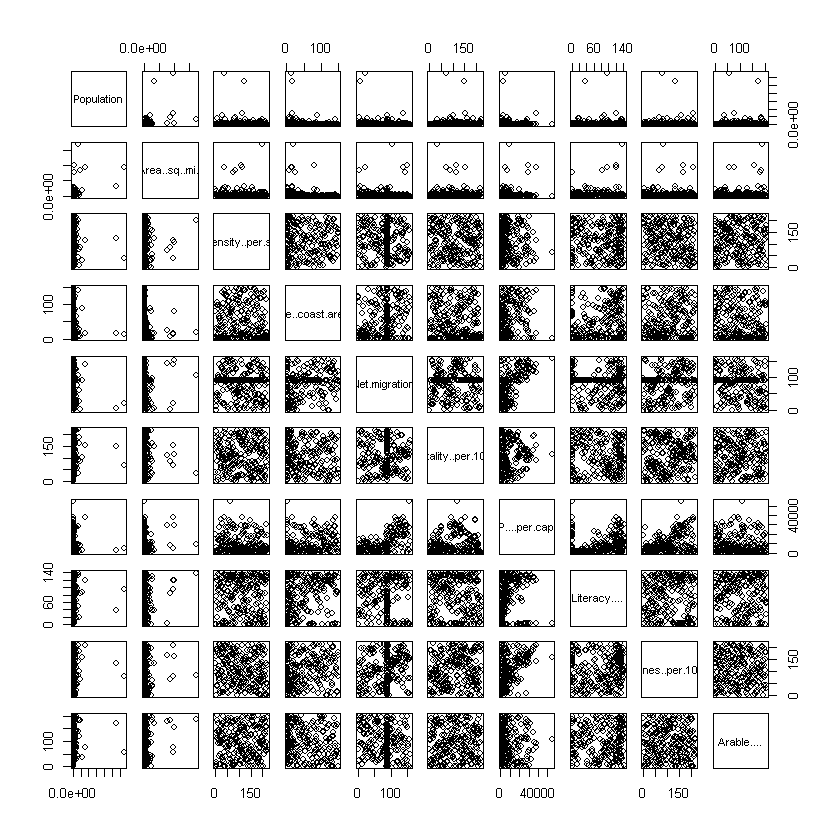

In [28]:
#Produce our scatterplot matrix
pairs(countries[, 1:10])

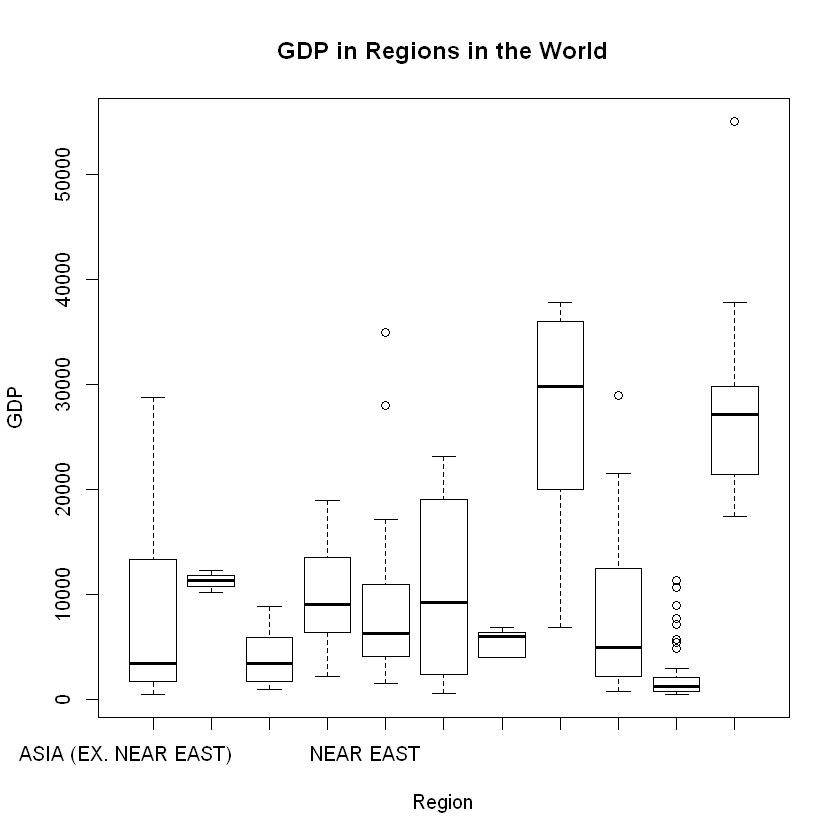

In [60]:
#Plot a side-by-side boxplots of GDP in all Regions
plot(rownames$Region, countries$GDP, 
     xlab = "Region", ylab = "GDP", 
     main = "GDP in Regions in the World")

In [42]:
#Create a variable called "CountryStatus" 
#by binning the "GDP....per.capita." variable

CountryStatus <- rep("Developing", nrow(countries))
CountryStatus[countries$GDP....per.capita. > 12000] <- "Developed"
CountryStatus <- as.factor(CountryStatus)

countries$CountryStatus <- CountryStatus
summary(countries$CountryStatus)

Developed Developing 
        66        161

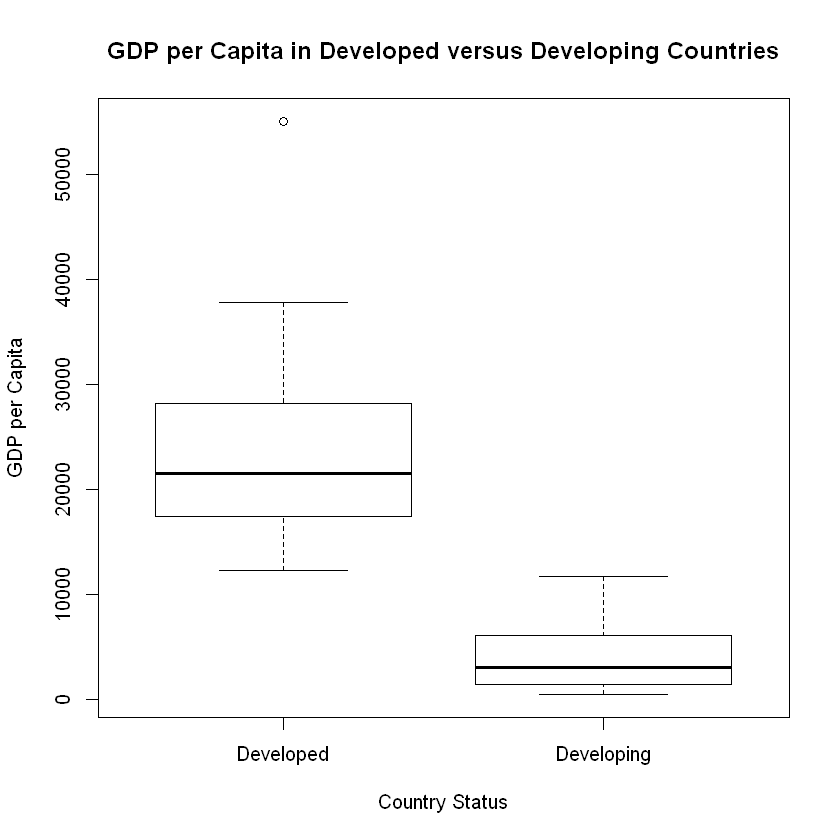

In [43]:
#Plot the GDP in Developed versis Developing Countries
plot(countries$CountryStatus, countries$GDP....per.capita., 
     xlab = "Country Status", ylab = "GDP per Capita",
     main = "GDP per Capita in Developed versus Developing Countries")

In [57]:
#Check the datatype 
str(countries)

'data.frame':	227 obs. of  21 variables:
 $ Country                           : Factor w/ 227 levels "Afghanistan ",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Region                            : Factor w/ 11 levels "ASIA (EX. NEAR EAST)         ",..: 1 4 7 9 11 10 5 5 5 3 ...
 $ Population                        : int  31056997 3581655 32930091 57794 71201 12127071 13477 69108 39921833 2976372 ...
 $ Area..sq..mi..                    : int  647500 28748 2381740 199 468 1246700 102 443 2766890 29800 ...
 $ Pop..Density..per.sq..mi..        : Factor w/ 219 levels "0,0","1,0","1,8",..: 149 24 31 103 49 209 36 52 40 219 ...
 $ Coastline..coast.area.ratio.      : Factor w/ 151 levels "0,00","0,01",..: 1 53 4 129 1 11 130 111 15 1 ...
 $ Net.migration                     : Factor w/ 158 levels "","-0,02","-0,03",..: 138 79 20 64 154 90 117 82 98 83 ...
 $ Infant.mortality..per.1000.births.: Factor w/ 221 levels "","10,03","10,09",..: 38 63 96 208 104 49 60 46 33 66 ...
 $ GDP....per.capita.            

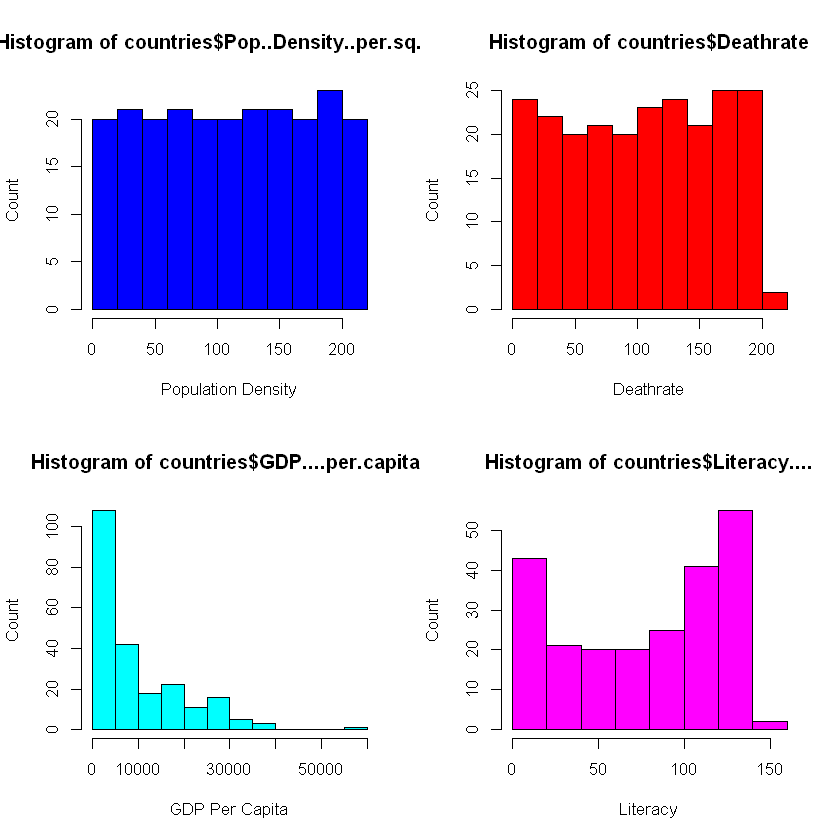

In [78]:
#Create Histograms for Quantitative Variables
countries$Literacy.... <- as.numeric(countries$Literacy....)
countries$Deathrate <- as.numeric(countries$Deathrate)
countries$Pop..Density..per.sq..mi.. <- as.numeric(countries$Pop..Density..per.sq..mi..)
par(mfrow = c(2,2))
hist(countries$Pop..Density..per.sq..mi.., col = 4, xlab = "Population Density", ylab = "Count")
hist(countries$Deathrate, col = 10, xlab = "Deathrate", ylab = "Count")
hist(countries$GDP....per.capita., col = 5, xlab = "GDP Per Capita", ylab = "Count")
hist(countries$Literacy...., col = 6, xlab = "Literacy", ylab = "Count")

Warning message:
"Removed 1 rows containing missing values (geom_point)."

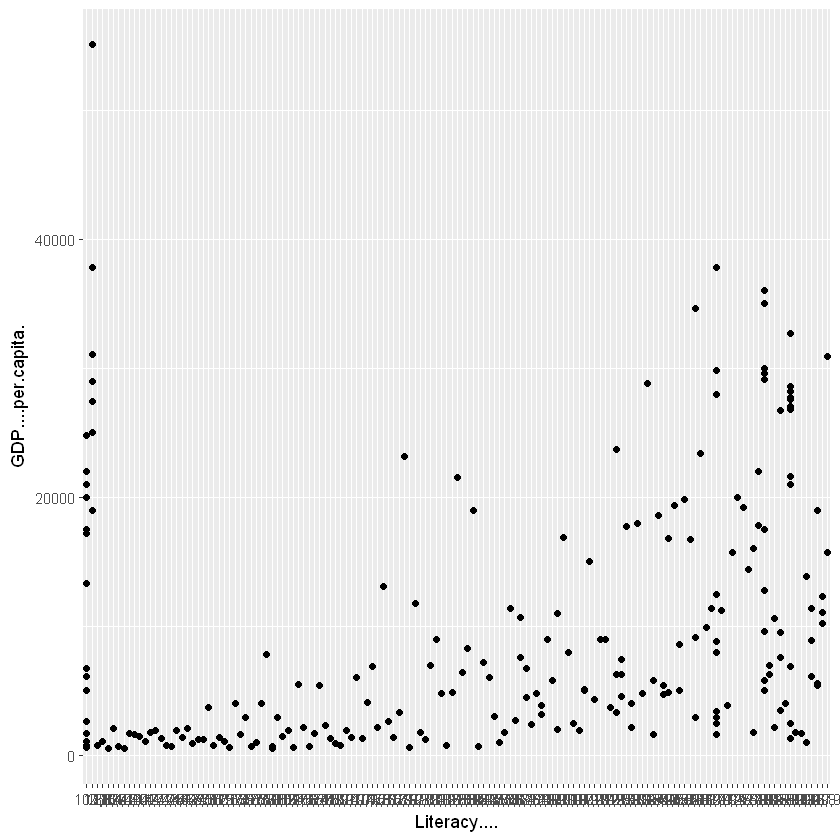

In [95]:
#install data visualization package
#install.packages("ggplot2")
library("ggplot2")

#Expore the variables
ggplot(countries, aes(x = Literacy...., y = GDP....per.capita.)) +
        geom_point()